In [1]:
import pandas as pd

def load_data():
    return pd.read_csv("datasets/ckd.csv")
data = load_data()

In [14]:
columns = list(data.columns)

classes = list(data["CKD_Stage"].unique())
# transform classes from numpy int to string to be printed
classes = [str(c) for c in classes]

Accuracy: 0.99


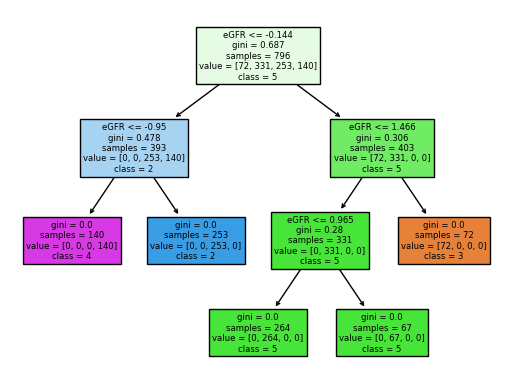

In [34]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def tree_classifier(X_train, y_train, X_test, y_test):
    # fit the decision tree classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # evaluate the classifier
    accuracy = clf.score(X_test, y_test)
    print(f"Accuracy: {accuracy:.2f}")

    # visualise the decision tree
    tree.plot_tree(clf, feature_names=columns[:-1], class_names=classes, filled=True)


# scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=["CKD_Stage"]))

# target
X = data_scaled
y = data["CKD_Stage"]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_classifier(X_train, y_train, X_test, y_test)


In [ ]:
# new target: CKD_Progression
data_scaled = scaler.fit_transform(data.drop(columns=["CKD_Progression"]))

y = data["CKD_Progression"]
X = data_scaled
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_classifier(X_train, y_train, X_test, y_test)

Accuracy: 0.80


Claramente Decision Trees não foram uma boa escolha aqui